# COVID-19 in Australia
*A report on the number of Covid cases and deaths in Australia for a period of three years.*<br><br>

*Name: Anisha Mariam Abraham <br>*
*Date: 10 September, 2023 <br>*


COVID-19 is a disease caused by a virus named SARS-CoV-2 and was discovered in December 2019 in Wuhan, China. It is very contagious and has quickly spread around the world. COVID-19 has turned the world upside down. Every aspect of our lives has been affected and it is still lurking around amongst us.



## Data Collection

To study the effect of COVID-19 in Australia, we will use some competitive aspects of Python to visualise weekly number of cases and deaths in **five regions** namely **New South Wales (NSW), Victoria (VIC), Queensland (QLD), Western Australia (WA) and South Australia (SA)**. Data has been collected from [COVID LIVE](https://covidlive.com.au/) and we will be focusing specifically on the number of cases and deaths from **25 January, 2020** to **18 August, 2023**. <br>

Data was received as a zip file titled `covid_data.zip` containing number of cases and deaths in separate `.tsv` files for each region. <br>

We can begin by importing the following libraries required for extraction and visualisation of COVID-19 data:
1. **Numpy:** It provides support for scientific computing using mathematical functions in Python.
2. **Pandas:** It provides data structures like DataFrames and Series and it is a powerful library for data manipulation and analysis.
3. **Seaborn:** It is a data visualization library based on Matplotlib for creating informative and attractive statistical graphics.
4. **Matplotlib:** It offers both a simple interface for creating plots and working with dates and times in Matplotlib plots.
5. **os:** It allows you to perform operations such as file and directory manipulation.
6. **zipfile:** It allows you to create, read, write, and extract files from ZIP archives.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import zipfile

In [2]:
# Set the directory path where TSV files are stored
with zipfile.ZipFile('covid_data.zip', 'r') as zip_ref:
    zip_ref.extractall('covid_data')
directory_path = 'covid_data'

# Create an empty dictionary to store dataframes for cases and deaths
dataframes_cases = []
dataframes_deaths = []

# Iterate over all TSV files in the directory
# Read TSV file into a Pandas dataframe, create new column and add region name, 
# add dataframe to separate list depending on whether its cases or deaths data.
for filename in os.listdir(directory_path):
    if filename.endswith('.tsv') and 'daily_cases' in filename:
        df_cases = pd.read_table(os.path.join(directory_path, filename))
        df_cases['REGION'] = filename.split("_", 2)[-1].split(".")[0].upper()
        dataframes_cases.append(df_cases)
        
    else:
        df_deaths = pd.read_table(os.path.join(directory_path, filename))
        df_deaths['REGION'] = filename.split("_", 2)[-1].split(".")[0].upper()
        dataframes_deaths.append(df_deaths)   

# Combining the dataframes to create separate dataframes for cases and deaths. 
# It will ignore the existing row indices of the individual DataFrames 
# and create a new index ranging from 0 to the total number of rows.
df_cases = pd.concat(dataframes_cases, ignore_index=True)
df_deaths = pd.concat(dataframes_deaths, ignore_index=True)


In [3]:
df_cases

,DATE,NEW,CASES,VAR,NET,REGION
0,18 Aug 23,481,"929,773",NaN,481,SA
1,11 Aug 23,503,"929,292",NaN,"-3,648",SA
2,04 Aug 23,526,"932,940",NaN,527,SA
3,28 Jul 23,481,"932,413",NaN,481,SA
4,21 Jul 23,634,"931,932",NaN,393,SA
...,...,...,...,...,...,...
5035,29 Jan 20,0,4,NaN,0,NSW
5036,28 Jan 20,0,4,NaN,0,NSW
5037,27 Jan 20,1,4,NaN,1,NSW
5038,26 Jan 20,0,3,NaN,0,NSW


`df_cases` has **5040 rows and 6 columns** of readings from five regions.
1. **DATE:** It gives the date on which the record was noted.
2. **NEW:** It gives new cases for the particular date.
3. **CASES:** It gives cumulative cases with respect to previous date NET record.
4. **VAR:** It is a symbol that depicts increase or decrease in NET/NEW from the previous date record.
5. **NET:** It gives the adjust new cases for the particular date.
6. **REGION:** It provides the Region name from where the record is noted.

In [4]:
df_deaths

,DATE,DEATHS,VAR,NET,REGION
0,18 Aug 23,"8,347",NaN,15,VIC
1,11 Aug 23,"8,332",NaN,27,VIC
2,04 Aug 23,"8,305",NaN,29,VIC
3,28 Jul 23,"8,276",NaN,42,VIC
4,21 Jul 23,"8,234",NaN,45,VIC
...,...,...,...,...,...
5035,29 Jan 20,0,NaN,0,SA
5036,28 Jan 20,0,NaN,0,SA
5037,27 Jan 20,0,NaN,0,SA
5038,26 Jan 20,0,NaN,0,SA


`df_deaths` has **5040 rows and 5 columns** of readings from five regions.
1. **DATE:** It gives the date on which the record was noted.
2. **DEATHS:** It gives cumulative deaths with respect to previous date NET record.
3. **VAR:** It is a symbol that depicts increase or decrease in NET from the previous date record.
4. **NET:** It gives new deaths for the particular date.
5. **REGION:** It provides the Region name from where the record is noted.

## Data Cleaning

From `df_cases` and `df_deaths`, **VAR** is not of any interest to us. We can also drop **NET** from `df_cases` as it gives adjusted value.

In [5]:
df_cases = df_cases.drop(columns =['VAR','NET'])
df_deaths = df_deaths.drop(columns = ['VAR'])

To increase readibility and understanding from our tables, we can rename the column names. <br><br>
In `df_cases`, **NEW** can be named as **DAILY_CASES** and **CASES** as **CUM_CASES** to show cumulative cases.<br>
In `df_deaths`, **NET** can be named as **DAILY_DEATHS** and **DEATHS** as **CUM_DEATHS** to show cumulative deaths.

In [6]:
df_cases.rename(columns = {'NEW':'DAILY_CASES', 'CASES':'CUM_CASES'}, inplace = True)
df_deaths.rename(columns = {'DEATHS':'CUM_DEATHS', 'NET':'DAILY_DEATHS'}, inplace = True)

The **DATE** columns in both the tables can be converted to a datetime data type using the pd.DatetimeIndex function in order to perform various date and time-related operations on it. This includes extracting components like year, month, day, hour, minute, and second, calculating time differences, and working with specific dates and time intervals. Converting dates to datetime format helps ensure data consistency and correctness. 

In [7]:
df_cases['DATE'] = pd.DatetimeIndex(df_cases['DATE'])
df_deaths['DATE'] = pd.DatetimeIndex(df_deaths['DATE'])

In `df_cases` and `df_deaths`, we can convert **DAILY_CASES**, **DAILY_DEATHS**, **CUM_CASES** and **CUM_DEATHS** to `numeric` by replacing commas *(,)* and filling zeroes in empty positions.

In [8]:
df_cases['DAILY_CASES'] = df_cases['DAILY_CASES'].str.replace(',', '').fillna(0).astype(int) # remove ','
df_cases['CUM_CASES'] = df_cases['CUM_CASES'].str.replace(',', '').fillna(0).astype(int) # remove ','
df_deaths['DAILY_DEATHS'] = pd.to_numeric(df_deaths['DAILY_DEATHS'], errors='coerce').fillna(0) # '-' should mean negative
df_deaths['CUM_DEATHS'] = df_deaths['CUM_DEATHS'].str.replace(',', '').fillna(0).astype(int) # remove ','


In [9]:
df_cases

,DATE,DAILY_CASES,CUM_CASES,REGION
0,2023-08-18,481,929773,SA
1,2023-08-11,503,929292,SA
2,2023-08-04,526,932940,SA
3,2023-07-28,481,932413,SA
4,2023-07-21,634,931932,SA
...,...,...,...,...
5035,2020-01-29,0,4,NSW
5036,2020-01-28,0,4,NSW
5037,2020-01-27,1,4,NSW
5038,2020-01-26,0,3,NSW


In [10]:
df_deaths

,DATE,CUM_DEATHS,DAILY_DEATHS,REGION
0,2023-08-18,8347,15.0,VIC
1,2023-08-11,8332,27.0,VIC
2,2023-08-04,8305,29.0,VIC
3,2023-07-28,8276,42.0,VIC
4,2023-07-21,8234,45.0,VIC
...,...,...,...,...
5035,2020-01-29,0,0.0,SA
5036,2020-01-28,0,0.0,SA
5037,2020-01-27,0,0.0,SA
5038,2020-01-26,0,0.0,SA


In our data, it can be observed that readings till **9 September 2022** are recorded *daily* and the rest of the data is recorded on a *weekly-basis*. We can bring a uniformity to the data by ensuring all the dates are in a **weekly** format. 

In [11]:
# Cases

# Calculate the date of the Friday for each week
df_cases['WEEK_DATE'] = df_cases['DATE'] + pd.to_timedelta((4 - df_cases['DATE'].dt.dayofweek) % 7, unit='d')

# Group by 'Region' and 'WeekDate' and perform aggregation (e.g., sum of 'DAILY_CASES')
grouped_cases = df_cases.groupby(['REGION', 'WEEK_DATE']).agg({'DAILY_CASES': 'sum'}).reset_index()
grouped_cases.rename(columns = {'DAILY_CASES':'WEEKLY_CASES'}, inplace = True)

# Deaths

# Calculate the date of the Friday for each week
df_deaths['WEEK_DATE'] = df_cases['DATE'] + pd.to_timedelta((4 - df_cases['DATE'].dt.dayofweek) % 7, unit='d')

# Group by 'Region' and 'WeekDate' and perform aggregation (e.g., sum of 'DAILY_DEATHS')
grouped_deaths = df_deaths.groupby(['REGION', 'WEEK_DATE']).agg({'DAILY_DEATHS': 'sum'}).reset_index()
grouped_deaths.rename(columns = {'DAILY_DEATHS':'WEEKLY_DEATHS'}, inplace = True)


In [12]:
grouped_cases

,REGION,WEEK_DATE,WEEKLY_CASES
0,NSW,2020-01-31,1
1,NSW,2020-02-07,0
2,NSW,2020-02-14,0
3,NSW,2020-02-21,0
4,NSW,2020-02-28,0
...,...,...,...
925,WA,2023-07-21,751
926,WA,2023-07-28,697
927,WA,2023-08-04,517
928,WA,2023-08-11,677


In [13]:
grouped_deaths

,REGION,WEEK_DATE,WEEKLY_DEATHS
0,NSW,2020-01-31,0.0
1,NSW,2020-02-07,0.0
2,NSW,2020-02-14,0.0
3,NSW,2020-02-21,0.0
4,NSW,2020-02-28,0.0
...,...,...,...
925,WA,2023-07-21,4.0
926,WA,2023-07-28,60.0
927,WA,2023-08-04,11.0
928,WA,2023-08-11,10.0


Both `grouped_cases` and `grouped_deaths` contains 930 records each of weekly new cases and deaths according to region and week date. <br><br>

Another thing to note is that, for some regions, we can see there are **negative** weekly deaths recorded as shown in the example below for SA region.

In [14]:
grouped_deaths[(grouped_deaths['REGION'] == 'SA') & (grouped_deaths['WEEKLY_DEATHS'] < 0)]

,REGION,WEEK_DATE,WEEKLY_DEATHS
517,SA,2022-11-11,-3.0
531,SA,2023-02-17,-11.0
535,SA,2023-03-17,-5.0
536,SA,2023-03-24,-2.0
551,SA,2023-07-07,-2.0


This can be due to the fact that maybe these deaths were initially assumed to be COVID deaths but in the following week, they have corrected the error. We can proceed without tampering this data as this does not affect our analysis. <br><br>

The total number of cases and deaths during the given time period can be seen below.

In [15]:
print("Total number of cases in Australia:", grouped_cases["WEEKLY_CASES"].sum())
print("Total number of deaths in Australia:", grouped_deaths["WEEKLY_DEATHS"].sum())

Total number of cases in Australia: 11325704
Total number of deaths in Australia: 21829.0


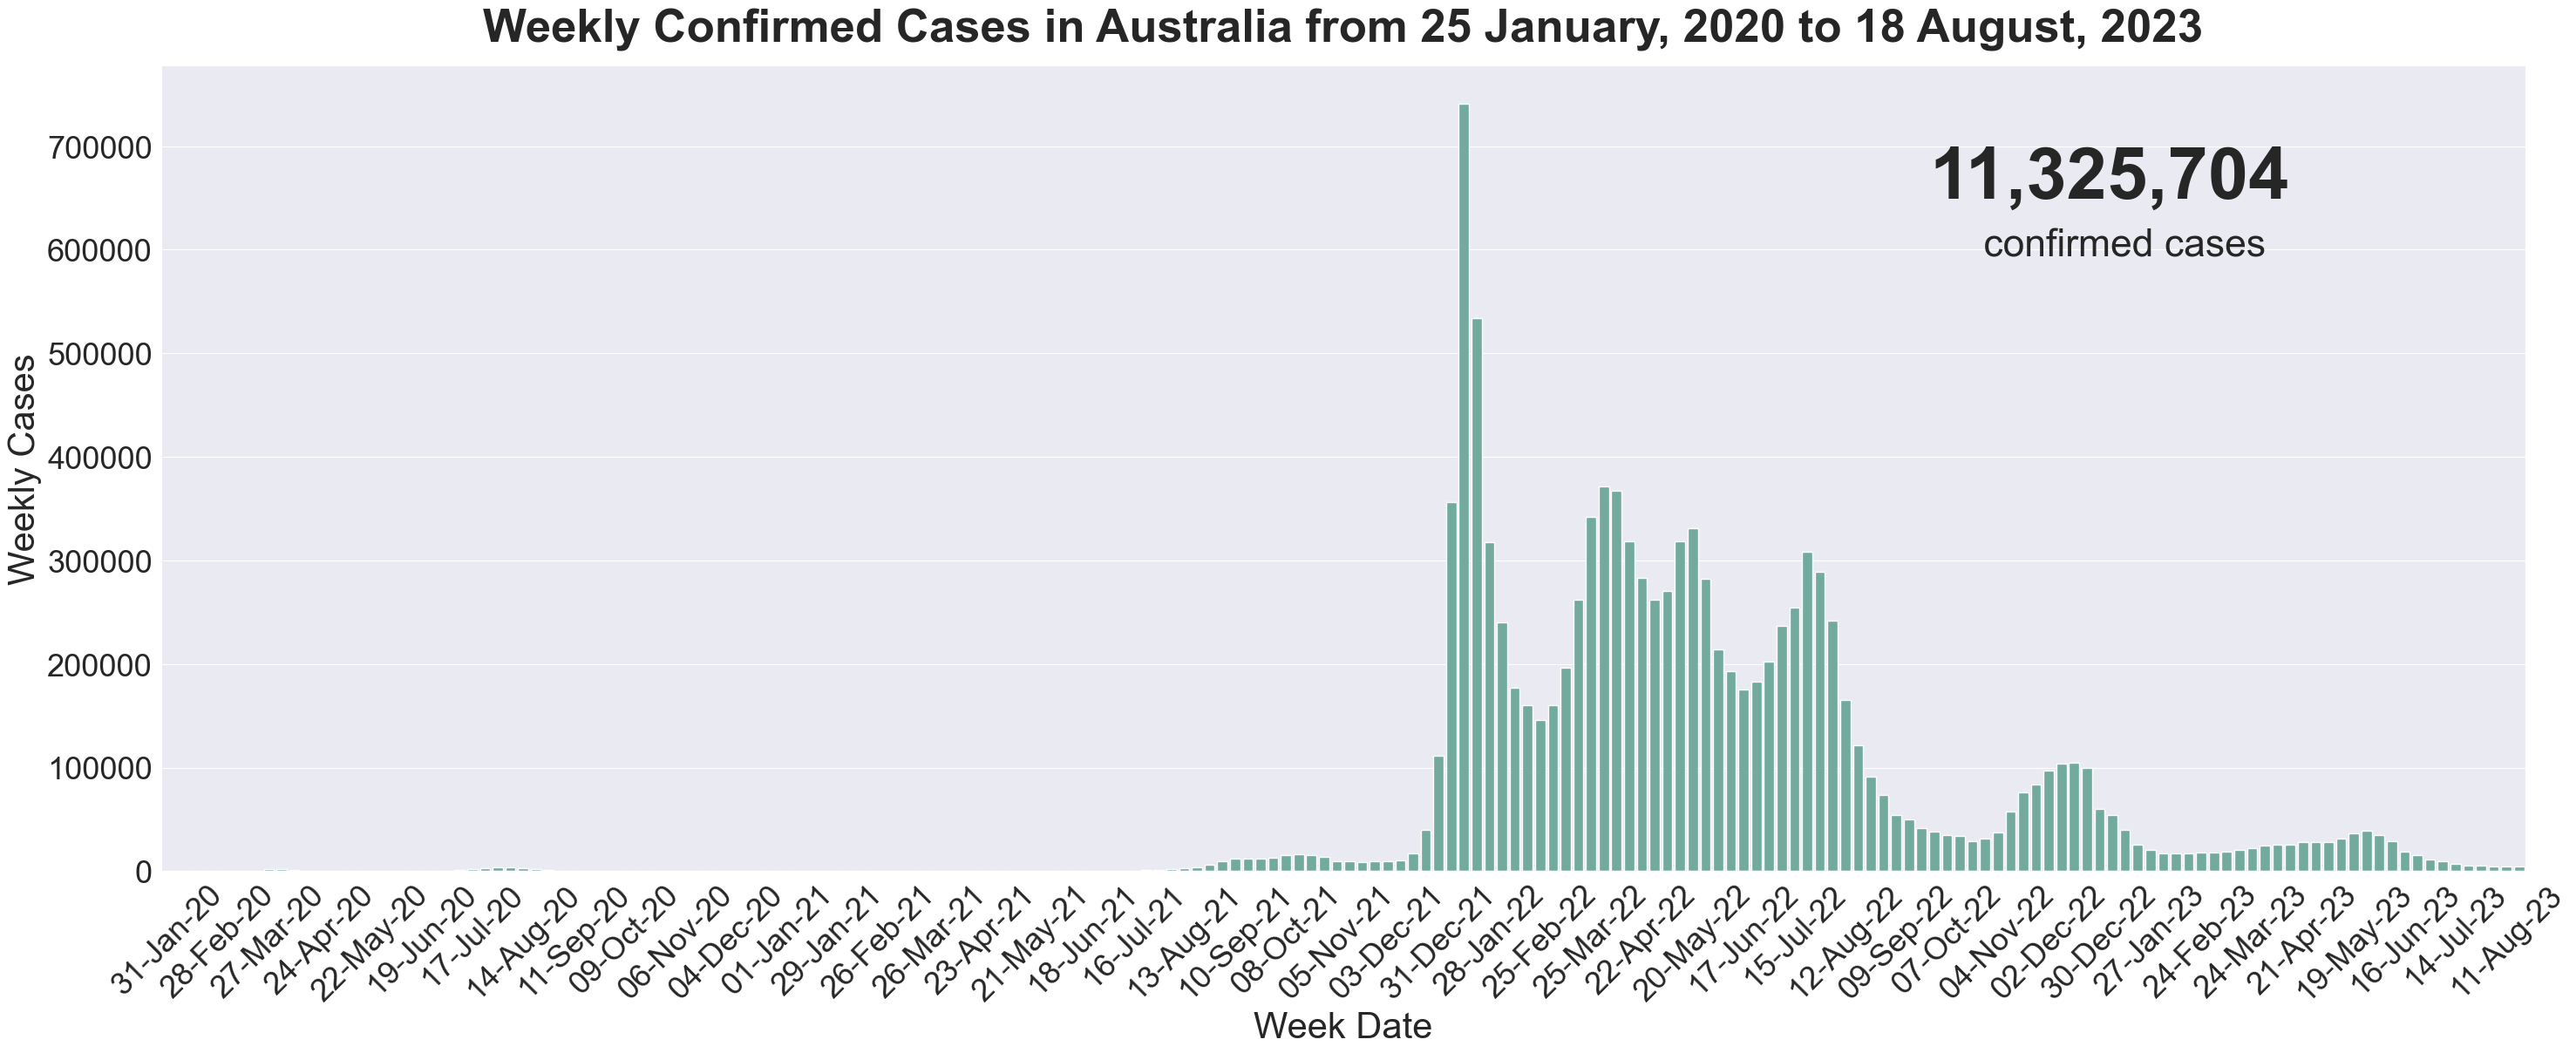

In [16]:
# Set the style to "seaborn"
sns.set_style("darkgrid")

# Filter the data for all regions
data = grouped_cases.groupby("WEEK_DATE")["WEEKLY_CASES"].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(35, 12))
ax = sns.barplot(
    x="WEEK_DATE",
    y="WEEKLY_CASES",
    data=data,
    color="#69b3a2"
)

date_format = "%d-%b-%y"  # Format as "01-Sep", adjust as needed
xtick_labels = [d.strftime(date_format) for d in data["WEEK_DATE"]]

# Display only alternate x-axis tick labels
ax.set_xticks(ax.get_xticks()[::4])
ax.set_xticklabels(xtick_labels[::4])

# Rotate the x-axis labels
plt.xticks(rotation=45)  # You can adjust the rotation angle as needed

# Increase the font size of x and y-axis labels
plt.xlabel("Week Date", fontsize=30)  
plt.ylabel("Weekly Cases", fontsize=30)


# Increase the font size of tick labels
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Add a title to the plot
title_text = "Weekly Confirmed Cases in Australia from 25 January, 2020 to 18 August, 2023"
plt.title(title_text, fontsize=38, pad=20, fontweight='bold')

# Add the total confirmed cases
plt.text(0.9, 0.9, "11,325,704", fontsize=60, fontweight='bold', ha='right', va='top', transform=ax.transAxes)
plt.text(0.89, 0.85, "\n confirmed cases", fontsize=32, ha='right', va='top', transform=ax.transAxes)

plt.show()


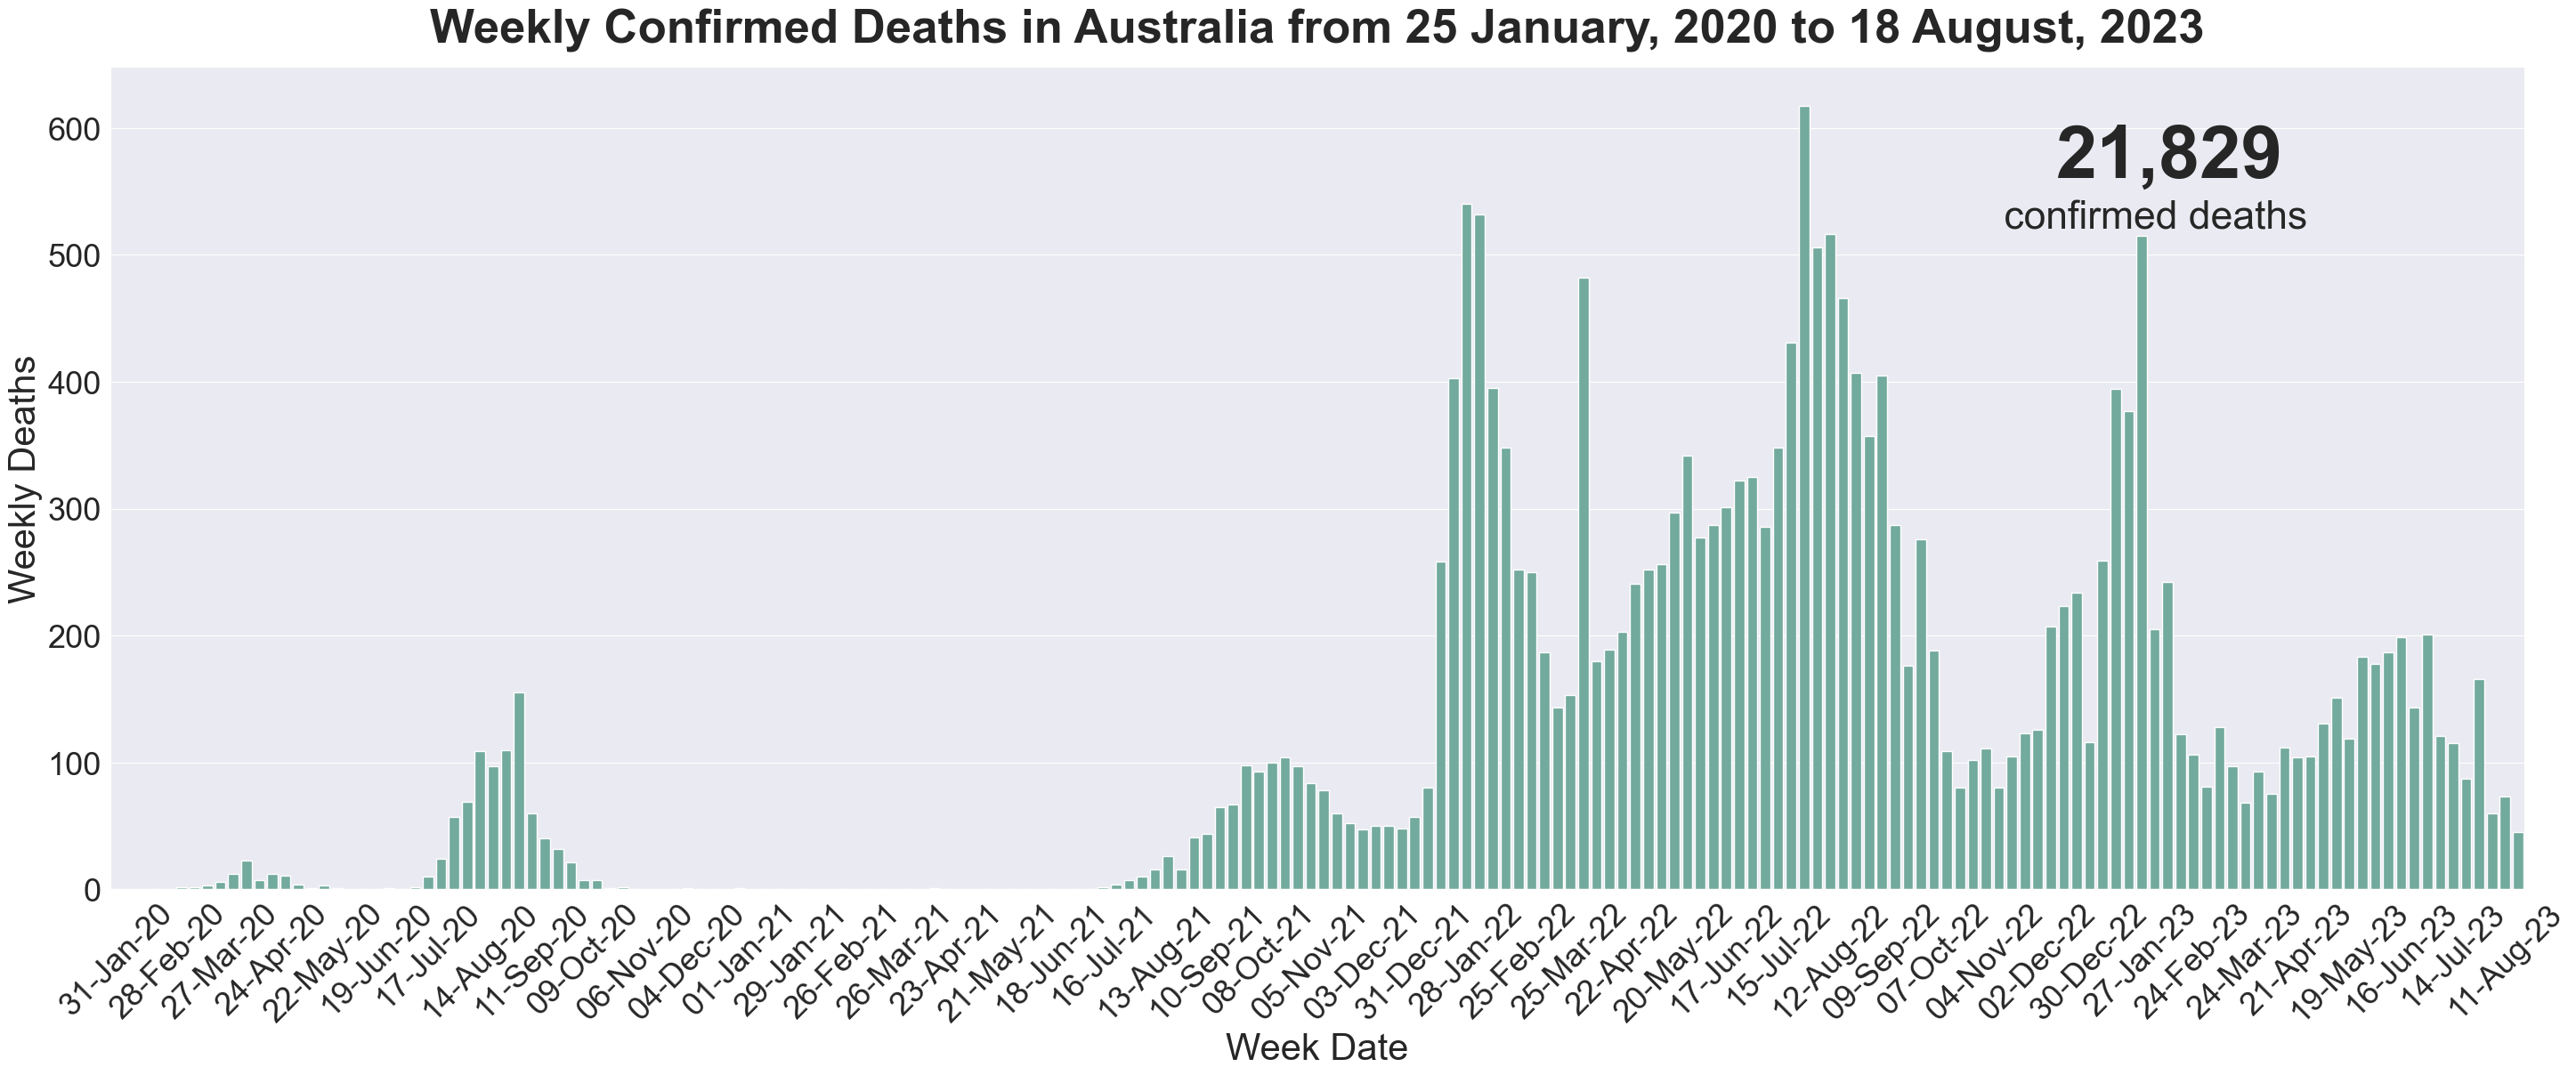

In [17]:
# Set the style to "seaborn"
sns.set_style("darkgrid")

# Filter the data for all regions
data = grouped_deaths.groupby("WEEK_DATE")["WEEKLY_DEATHS"].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(35, 12))
ax = sns.barplot(
    x="WEEK_DATE",
    y="WEEKLY_DEATHS",
    data=data,
    color="#69b3a2"
)

date_format = "%d-%b-%y"  # Format as "01-Sep", adjust as needed
xtick_labels = [d.strftime(date_format) for d in data["WEEK_DATE"]]

# Display only alternate x-axis tick labels
ax.set_xticks(ax.get_xticks()[::4])
ax.set_xticklabels(xtick_labels[::4])

# Rotate the x-axis labels
plt.xticks(rotation=45)  # You can adjust the rotation angle as needed

# Increase the font size of x and y-axis labels
plt.xlabel("Week Date", fontsize=30)  
plt.ylabel("Weekly Deaths", fontsize=30)


# Increase the font size of tick labels
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Add a title to the plot
title_text = "Weekly Confirmed Deaths in Australia from 25 January, 2020 to 18 August, 2023"
plt.title(title_text, fontsize=38, pad=20, fontweight='bold')

# Add the total confirmed cases
plt.text(0.9, 0.93, "21,829", fontsize=60, fontweight='bold', ha='right', va='top', transform=ax.transAxes)
plt.text(0.91, 0.89, "\n confirmed deaths", fontsize=32, ha='right', va='top', transform=ax.transAxes)

plt.show()


In Australia, from 25 January, 2020 to 18 August, 2023, there have been **11,325,704 confirmed cases** of COVID-19 with **21,829 deaths**. From the above graphs, we can see how the numbers change over the weeks from both cases and deaths.<br>

Further, we will try to visualise the distributions of new weekly cases and deaths, growth of cases and deaths after first 1000 cases were reported, normalised graphs and relationship between cases and deaths in the five regions.

## Data Exploration

Firstly, `grouped_values` can be created which merges `grouped_cases` and `grouped_deaths` with respect to the **REGION** and **WEEK_DATE**.

In [18]:
grouped_values = pd.merge(grouped_cases, grouped_deaths, on = ['REGION', 'WEEK_DATE'])

In [19]:
grouped_values

,REGION,WEEK_DATE,WEEKLY_CASES,WEEKLY_DEATHS
0,NSW,2020-01-31,1,0.0
1,NSW,2020-02-07,0,0.0
2,NSW,2020-02-14,0,0.0
3,NSW,2020-02-21,0,0.0
4,NSW,2020-02-28,0,0.0
...,...,...,...,...
925,WA,2023-07-21,751,4.0
926,WA,2023-07-28,697,60.0
927,WA,2023-08-04,517,11.0
928,WA,2023-08-11,677,10.0


We can now use `grouped_values` to observe the **distribution of new cases and deaths weekly numbers** in five regions.

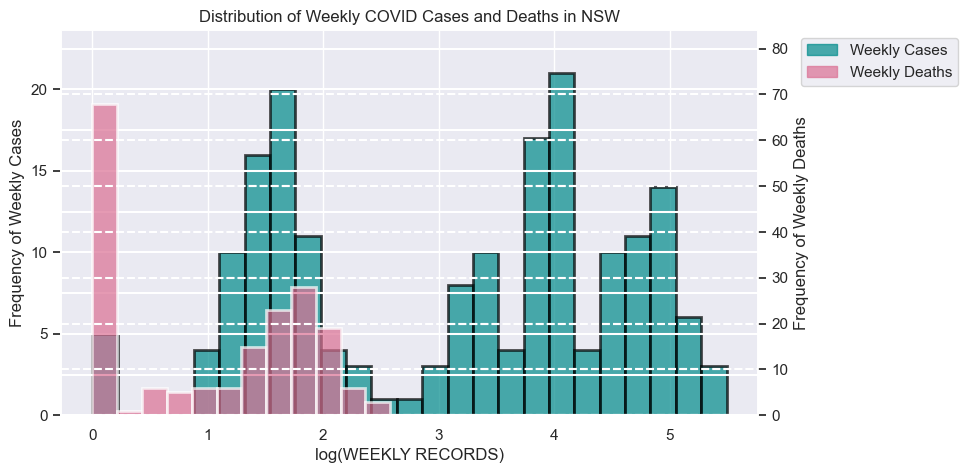

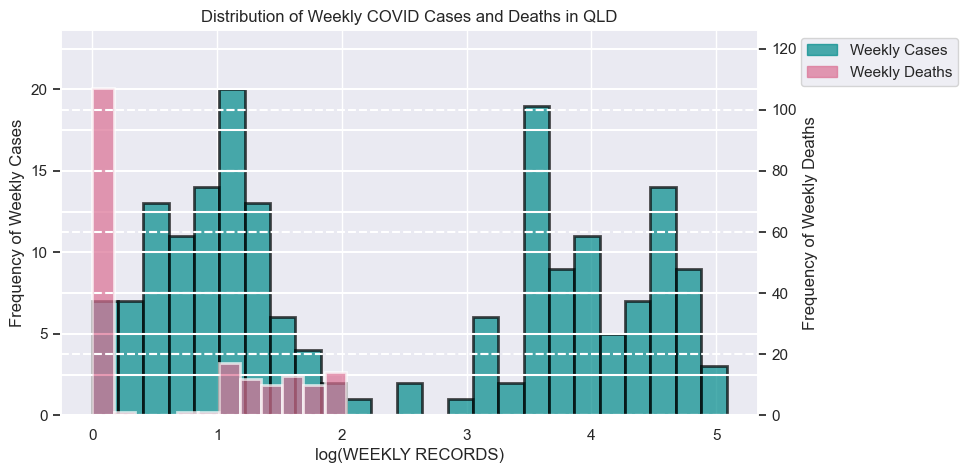

/Users/anisha/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


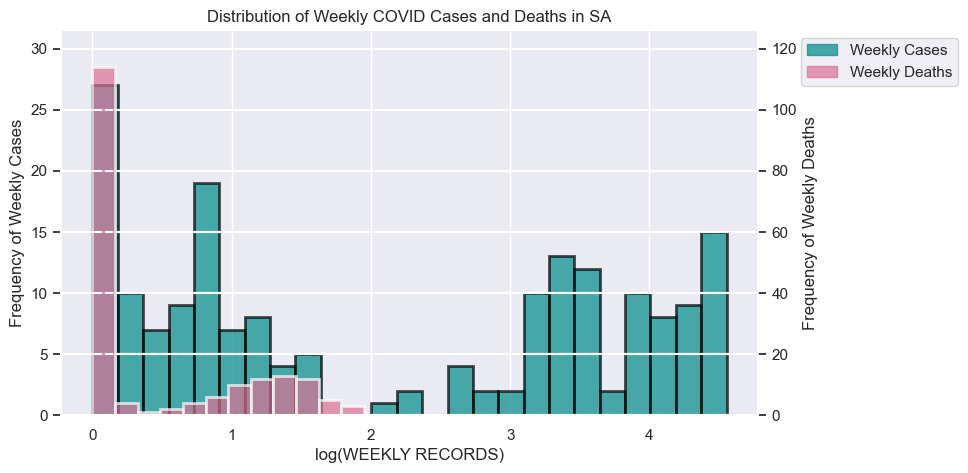

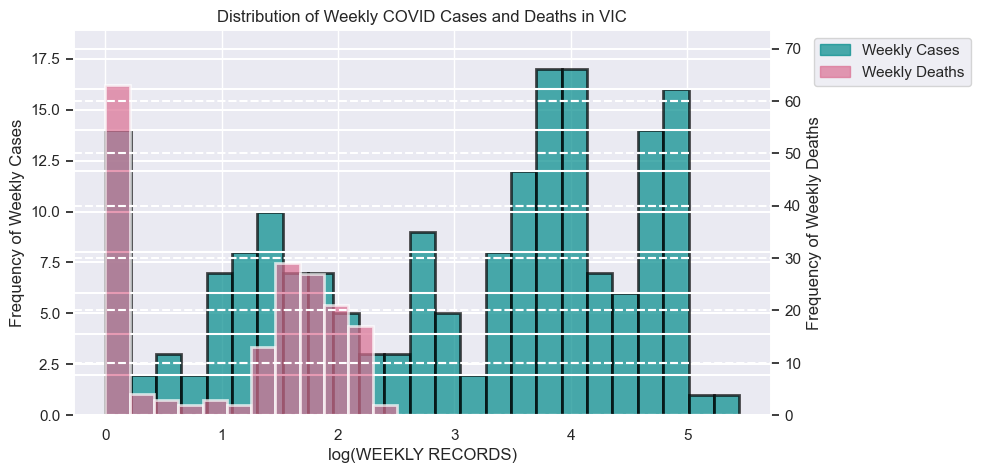

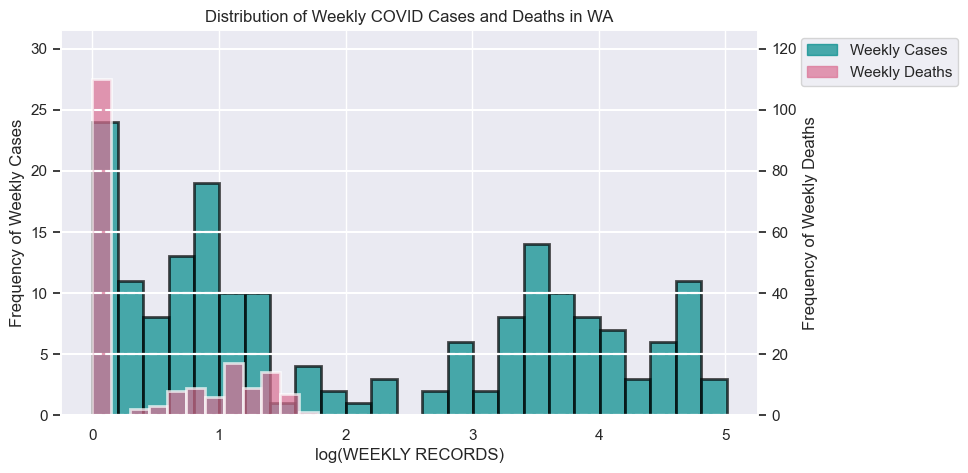

In [34]:

# Set the style to "seaborn"
sns.set_style("darkgrid")

# Set numpy error handling to ignore divide by zero warnings
np.seterr(divide='ignore')

for i in grouped_values['REGION'].unique():
    d1 = np.log10(grouped_values[grouped_values['REGION'] == i]['WEEKLY_CASES'])
    d1 = d1.replace([np.inf, -np.inf], np.nan)
    d1 = d1.fillna(0)
    
    d2 = np.log10(grouped_values[grouped_values['REGION'] == i]['WEEKLY_DEATHS'])
    d2 = d2.replace([np.inf, -np.inf], np.nan)
    d2 = d2.fillna(0)
    
    fig, ax1 = plt.subplots(figsize=(9, 5))

    # Create twin axes
    ax2 = ax1.twinx()

    ax1.hist([d1], bins=25, histtype='barstacked', linewidth=2, color='darkcyan', edgecolor='black', alpha=0.7)
    ax2.hist([d2], bins=12, histtype='barstacked', linewidth=2, color='palevioletred', alpha=0.7)
    
    # Get the y-tick values on the primary y-axis (left)
    y_ticks1 = ax1.get_yticks()

    # Add horizontal lines at the y-tick values of the primary y-axis
    for y in y_ticks1:
        ax1.axhline(y, color='w', linestyle='-', linewidth=1.5)  # Increase linewidth here

    # Get the y-tick values on the secondary y-axis (right)
    y_ticks2 = ax2.get_yticks()

    # Add horizontal lines at the y-tick values of the secondary y-axis
    for y in y_ticks2:
        ax2.axhline(y, color='w', linestyle='--', linewidth=1.5)  # Increase linewidth here

    ax1.set_xlabel('log(WEEKLY RECORDS)')
    ax1.set_ylabel('Frequency of Weekly Cases')
    ax2.set_ylabel('Frequency of Weekly Deaths')
    ax1.set_title(f'Distribution of Weekly COVID Cases and Deaths in {i}')

    # Enable grid lines for both y-axes with increased linewidth
    ax1.yaxis.grid(linestyle='-', color='white', linewidth=1.5) 
    ax2.yaxis.grid(linestyle='--', color='white', linewidth=1.5) 
    
    # Create custom legend handles and labels
    handles = [plt.Rectangle((0, 0), 1, 1, color='darkcyan', alpha=0.7),
               plt.Rectangle((0, 0), 1, 1, color='palevioletred', alpha=0.7)]
    labels = ['Weekly Cases', 'Weekly Deaths']

    # Add the legend outside the right boundary
    ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1))


    plt.show()

The above graph is a histogram created using the natural log values of **WEEKLY_CASES** and **WEEKLY_DEATHS** on x-axis and frequency both on *dual y-axes*. Here, each variable has its own y-axis scale. This allows us to compare the distributions side by side without trying to fit them on the same scale. <br>

The choice of *bin size* reflect the distribution of data. Smaller bins can reveal more details in the data, but they can also result in noise if the data is sparse. Larger bins may oversimplify the data distribution. Hence, suitable bin size has been selected. <br>

*Grid lines* have been plotted according to y-axes scales' to improve readibility of the graph. The entire y-axis has been transformed to a *logarithmic scale*. This means that the data points are still represented as they are, but the scale of the y-axis is adjusted. It compresses the range of values, making small values more visible.
The tick marks and grid lines on the y-axis are evenly spaced on a logarithmic scale, which can help in visualizing data that spans multiple orders of magnitude. While calculating log of values, natural log of any value below 1 is negative. So this negative value has been replaced by 0. <br>

The histogram above says the following: <br><br>
In all regions, most weeks had very low number of deaths since the frequency near 0 is the highest. 
For NSW, rest of the logs of weekly deaths ranged upto 2.5 which is around 380 deaths in a week. For QLD, rest of the weekly deaths range between 1 and 2 which is around 10 to 107 cases. For SA, almost 115 weeks have a low count of deaths with the maximum death count in a week of less than 2 (89 deaths). For VIC, almost 100 weeks are majorly between 1.5 and 2.2 value with gives a maximum of 322 deaths in a week. For WA, the maximum death count in a week is only around 1.75 which is around 60 deaths. 

**WA has the lowest maximum weekly death count followed by SA, QLD, VIC and NSW.**

For NSW, 20 weeks have case count around value 1.5 and 4 each with a maximum weekly case count of 311,364. For QLD, most cases are around 1 and 3.5 with maximum of 121,013 cases in a week. For SA, almost 27 weeks have low number of cases with maximum weekly case of 35,783. For VIC, 30 weeks had count 0 or between 3.8 and 4.1 with maximum weekly case of 280,445. For WA, 24 weeks had a low count of cases with maximum count of cases coming upto 5 which is around 102,000 cases. 

**SA has the least weekly maximum case count, followed by WA, QLD, VIC and NSW.**




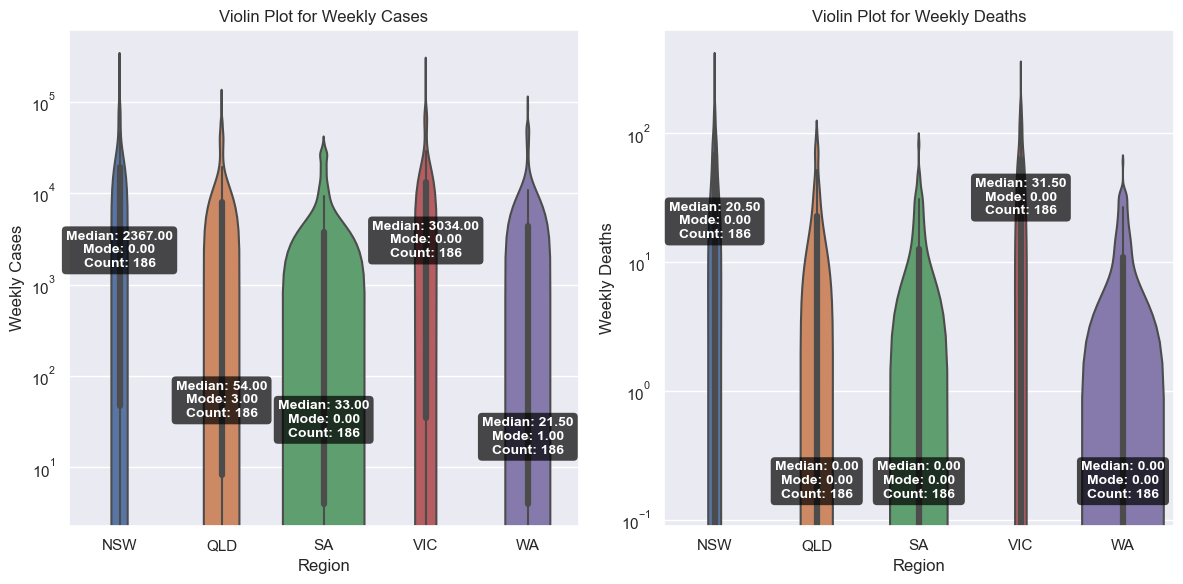

In [21]:
# Set a grey background
sns.set(style="darkgrid")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create a violinplot for WEEKLY_CASES
sns.violinplot(x="REGION", y="WEEKLY_CASES", data=grouped_values, ax=axes[0])
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].set_title("Violin Plot for Weekly Cases")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Weekly Cases")

medians_cases = grouped_values.groupby(['REGION'])['WEEKLY_CASES'].median().values
modes_cases = grouped_values.groupby(['REGION'])['WEEKLY_CASES'].apply(lambda x: x.mode().iloc[0]).values
nobs_cases = grouped_values['REGION'].value_counts().values

# Define a vertical position offset for annotations
offset = 0.1

# Loop through positions and add annotations for the first subplot (WEEKLY_CASES)
for i, tick in enumerate(axes[0].get_xticks()):
    x = tick
    y = medians_cases[i] + offset

    # Add shadow text with an offset and black box
    axes[0].text(
        x,
        y,
        f'Median: {medians_cases[i]:.2f}\nMode: {modes_cases[i]:.2f}\nCount: {nobs_cases[i]}',
        horizontalalignment='center',
        verticalalignment='center',
        size='small',
        color='white',
        weight='semibold',
        bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'),
    )



# Create a violinplot for WEEKLY_DEATHS
sns.violinplot(x="REGION", y="WEEKLY_DEATHS", data=grouped_values, ax=axes[1])
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].set_title("Violin Plot for Weekly Deaths")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Weekly Deaths")

medians_deaths = grouped_values.groupby(['REGION'])['WEEKLY_DEATHS'].median().values
modes_deaths = grouped_values.groupby(['REGION'])['WEEKLY_DEATHS'].apply(lambda x: x.mode().iloc[0]).values
nobs_deaths = grouped_values['REGION'].value_counts().values

# Define a vertical position offset
offset = 0.2

# Loop through positions and add annotations for the second subplot (WEEKLY_DEATHS)
for i, tick in enumerate(axes[1].get_xticks()):
    x = tick
    y = medians_deaths[i] + offset

    # Add shadow text with an offset and black box
    axes[1].text(
        x,
        y,
        f'Median: {medians_deaths[i]:.2f}\nMode: {modes_deaths[i]:.2f}\nCount: {nobs_deaths[i]}',
        horizontalalignment='center',
        verticalalignment='center',
        size='small',
        color='white',
        weight='semibold',
        bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'),
    )
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


The above violin plots compares distributions of **WEEKLY_CASES** and **WEEKLY_DEATHS** for the five regions. <br><br>

Re-iterating our previous observations, we can see that the **WEEKLY_CASES** and **WEEKLY_DEATHS** are higher for NSW, VIC and QLD as compared to SA and WA. In a violin plot, the width of the "violin" shape at any given point along the Y-axis represents the density or distribution of data points at that location. Wider sections of the violin indicate higher data point density, while narrower sections indicate lower density. <br><br>



## Data Transformation

Next, we can create a graph should start on the week after 1000 cases were reported and then show cumulative weekly numbers as we do a weekly-based analysis. For that, we create a column **CUM_SUM** in `grouped_cases` to find the cumulative sum of **WEEKLY_CASES** with respect to **REGION**.


In [22]:
grouped_cases['CUM_SUM'] = grouped_cases[['REGION', 'WEEKLY_CASES']].groupby('REGION').cumsum()

Since we are only interested from the week after 1000 cases are reported, we can extract those values and store in a new dataframe called `grouped_threshold_data`.

In [23]:
grouped_threshold_data = grouped_cases[grouped_cases['CUM_SUM'] > 1000 ].reset_index(drop = True)
grouped_threshold_data.index = grouped_threshold_data.index + 1

In [24]:
grouped_threshold_data

,REGION,WEEK_DATE,WEEKLY_CASES,CUM_SUM
1,NSW,2020-03-27,1052,1402
2,NSW,2020-04-03,984,2386
3,NSW,2020-04-10,433,2819
4,NSW,2020-04-17,113,2932
5,NSW,2020-04-24,60,2992
...,...,...,...,...
736,WA,2023-07-21,751,1370605
737,WA,2023-07-28,697,1371302
738,WA,2023-08-04,517,1371819
739,WA,2023-08-11,677,1372496


`grouped_threshold_data` contains 740 rows and 4 columns of all the weeks after the 1000 cases threshold for all regions.

### Data Visualisation

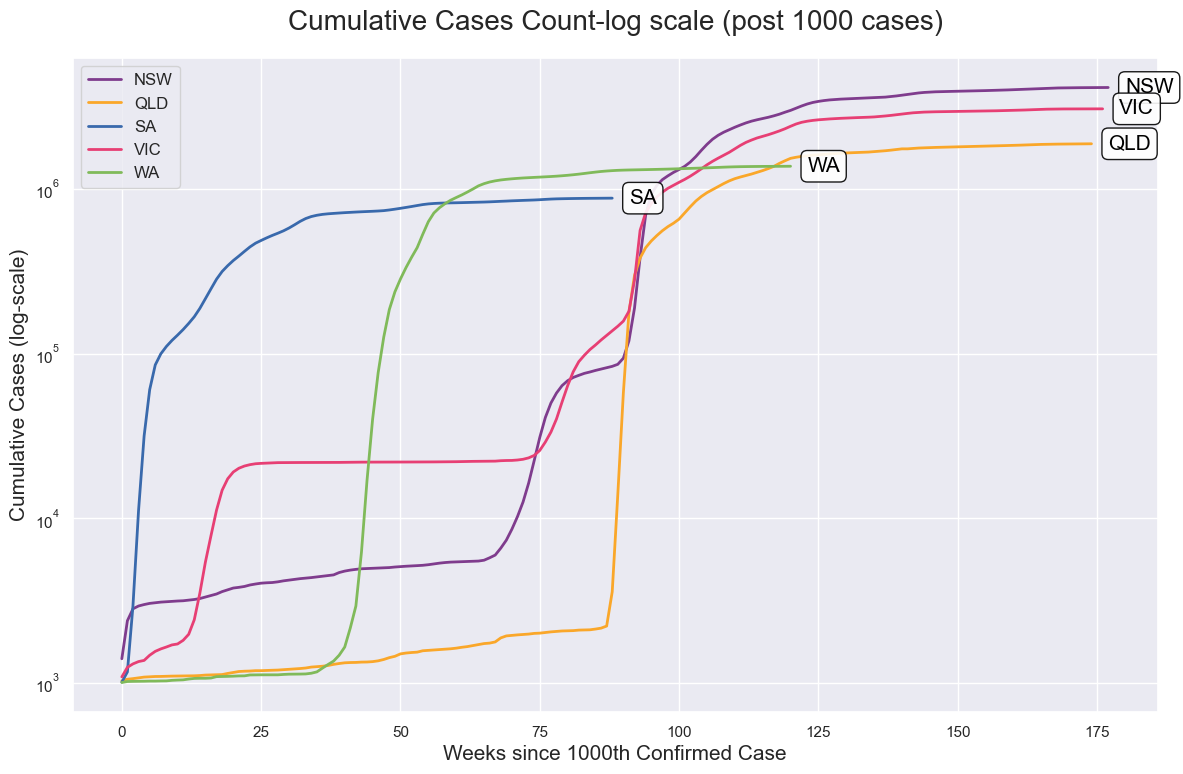

In [25]:
# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#faa72a", # BRA
    "#3969AC", # CHE
    "#E73F74", # EUZ
    "#80BA5A", # GBR
]

fig, ax = plt.subplots(figsize=(14, 8.5))

for idx,region in enumerate(grouped_threshold_data['REGION'].unique()):
    data = grouped_threshold_data[grouped_threshold_data['REGION'] == region].reset_index(drop = True)
    x = data.index  
    y = data['CUM_SUM']  
    ax.ticklabel_format(style='plain')
    ax.plot(x, y, marker='', label=region, linewidth=2, color = COLOR_SCALE[idx])
    # Add region name next to the line
    x_text = x[-1]  # Use the last x-value as the position for the text
    y_text = y.iloc[-1]  # Use the last y-value as the position for the text
    text_color = 'blue'  # Set the font color
    text_padding = 3  # Set the padding (adjust as needed)
    ax.text(
        x_text + text_padding,  # Adjust x-position with padding
        y_text,
        region,
        fontsize=15,
        verticalalignment='center',
        color='black',
        bbox=dict(facecolor='white', alpha=0.9, edgecolor='black', boxstyle='round')
    )

plt.yscale('log')

# Add labels, title, and legend with font size adjustments
ax.set_xlabel('Weeks since 1000th Confirmed Case', fontsize=15)  
ax.set_ylabel('Cumulative Cases (log-scale)', fontsize=15)  
ax.set_title('Cumulative Cases Count-log scale (post 1000 cases)', fontsize=20, pad=20)  
ax.legend(fontsize=12)  # Adjust font size as needed

# Show the plot
plt.show()

### Data Interpretation

From the above line-plot, we can observe that cumulative cases in SA climb steeply for around 10 weeks and straightens at around 37 weeks. It reaches it's maximum potential of COVID spread by around 90 weeks since SA has the least population among the five regions.<br>For WA, the steep increase starts after around week 30 and starts losing momentum by week 62. It reaches it's potential before 125 weeks.  By the time COVID spread in SA and WA has diminished, the COVID spread in the other three regions are still continuing because of their large population sizes. Cumulative cases in NSW, QLD and VIC rise till around 90 weeks and then reaches it's potential by 175 weeks. <br>

**SA spreads the fastest and infects majority of people. WA spreads slower than SA but again, completes its course due to small population size. NSW and VIC spread at an almost equal manner and infect people followed by a slower-paced QLD but these three regions finish the spread at the same time.**
<br><br>

Normalising cases as per population always us to make sensible comparisons between cases in the five regions. Let's normalise numbers of new cases by population and plot a calendar-based historical graph of weekly cases. <br>

Below is a dictionary `population` with regions as `keys` and populations of the five regions of interest as `values`.

In [26]:
population = {'NSW':8238800, 'VIC': 6704300, 'SA': 1834300, 'QLD': 5378300, 'WA': 2825200}

In [27]:
grouped_values['CASES_PER_CAPITA'] = grouped_values.apply(lambda row: row['WEEKLY_CASES'] / population.get(row['REGION'], 1), axis=1)
grouped_values['CASES_PER_1000000'] = grouped_values['CASES_PER_CAPITA'] * 1000000

The above code creates a new column **CASES_PER_CAPITA** where we take each weekly case and divide by the corresponding region's population. Using this value, we can compute **CASES_PER_1000000** by multiplying 1,000,000 with each **CASES_PER_CAPITA** value to get the weekly cases per 1,000,000 people.
Now, `grouped_values` is as below.

In [28]:
grouped_values

,REGION,WEEK_DATE,WEEKLY_CASES,WEEKLY_DEATHS,CASES_PER_CAPITA,CASES_PER_1000000
0,NSW,2020-01-31,1,0.0,1.213769e-07,0.121377
1,NSW,2020-02-07,0,0.0,0.000000e+00,0.000000
2,NSW,2020-02-14,0,0.0,0.000000e+00,0.000000
3,NSW,2020-02-21,0,0.0,0.000000e+00,0.000000
4,NSW,2020-02-28,0,0.0,0.000000e+00,0.000000
...,...,...,...,...,...,...
925,WA,2023-07-21,751,4.0,2.658219e-04,265.821889
926,WA,2023-07-28,697,60.0,2.467082e-04,246.708198
927,WA,2023-08-04,517,11.0,1.829959e-04,182.995894
928,WA,2023-08-11,677,10.0,2.396291e-04,239.629053


### Data visualisation

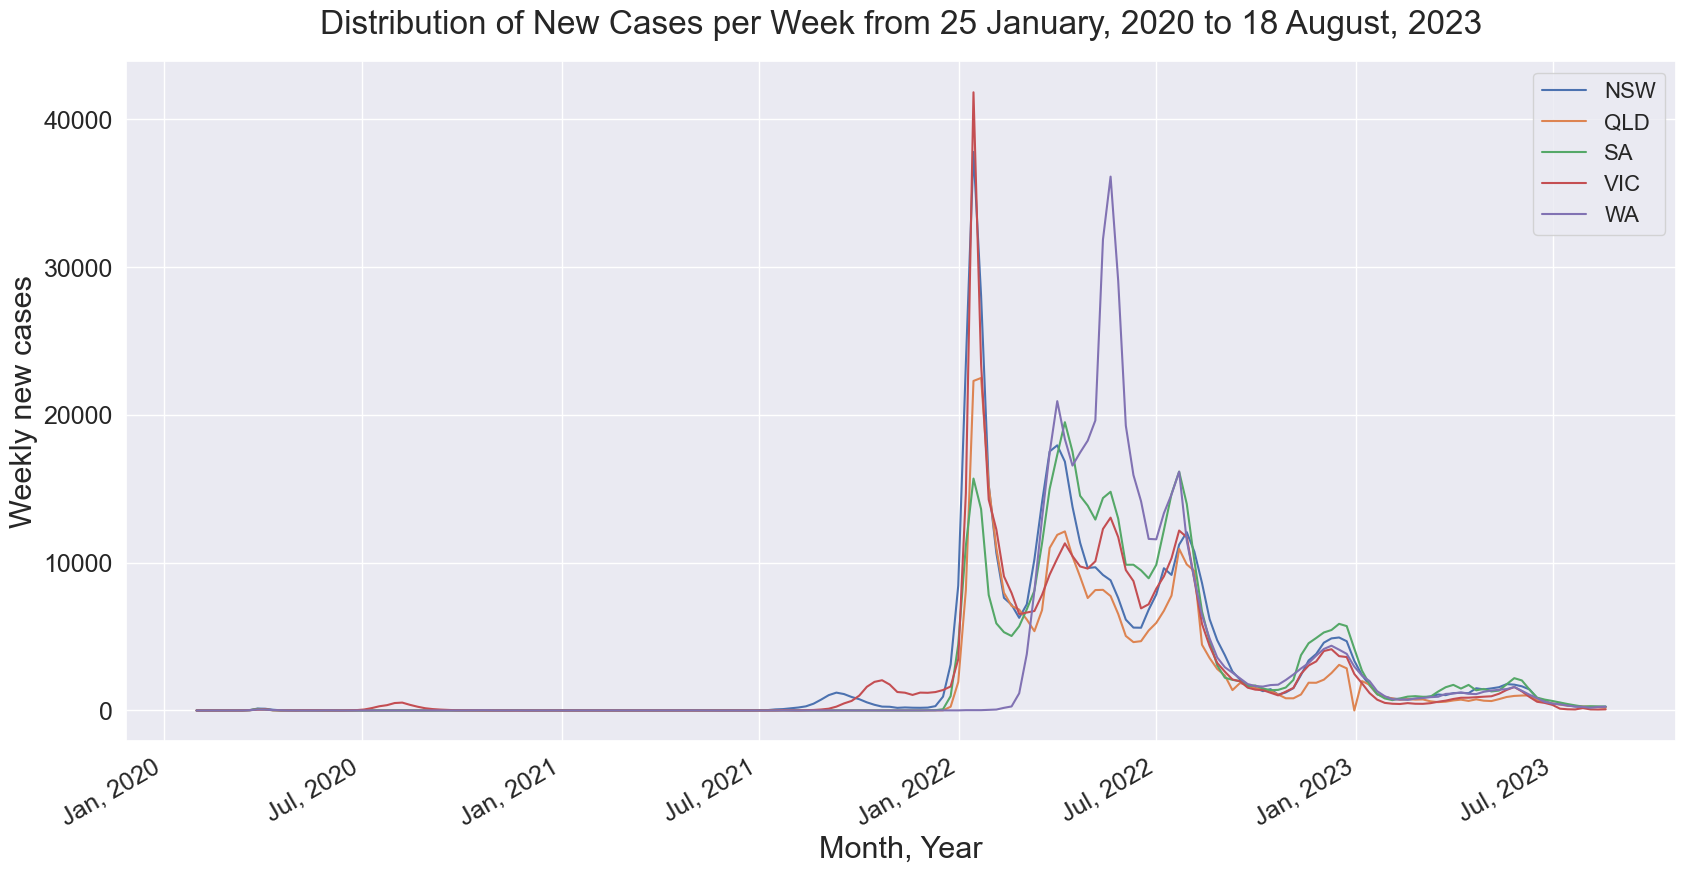

In [29]:
# Create an empty list to store legend labels
legend_labels = []

# Create the plot
fig, ax = plt.subplots(figsize=(20, 10))
month_year_formatter = mdates.DateFormatter('%b, %Y')
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")

for region in grouped_values['REGION'].unique():
    data = grouped_values[grouped_values['REGION'] == region]
    date = data["WEEK_DATE"]
    value = data['CASES_PER_1000000']
    
    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter)
    monthly_locator = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(monthly_locator)
    ax.xaxis.set_major_formatter(month_year_formatter)
    fig.autofmt_xdate()
    
    legend_labels.append(region)
    ax.plot(date, value)


#  Set the legend using the legend_labels list with increased font size
ax.legend(legend_labels, loc='upper right', fontsize=16)  

# Increase font size for title and labels
plt.xlabel('Month, Year', fontsize=22)
plt.ylabel('Weekly new cases', fontsize=22)
plt.title('Distribution of New Cases per Week from 25 January, 2020 to 18 August, 2023', fontsize=24, pad=20)

# Increase font size for y-axis and x-axis tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Show the plot
plt.show()


### Data Interpretation

The above line plot gives the calendar-based historical graph of normalised weekly cases using **CASES_PER_1000000**. We can see that from January 2020 to July 2021, the cases are pretty low except for the VIC region which peaked slightly in August 2020. From the second half of 2021, cases started rising for NSW and VIC, followed by the other three regions. In the beginning of 2022, the VIC region had more than 40,000 people per 1,000,000 with COVID closely followed by NSW. QLD had above 20,000 people and SA had around 15,000 people per 1,000,000 with COVID. WA had quite low cases which is not picked up by the above graph. In a few months, WA progressed to a whopping 37,000 odd COVID cases for every 1,000,000 people which is extremely large compared to its counterparts SA at 15,000 closely followed by VIC at 12,000 and NSW and QLD below 10,000 cases per 1,000,000. <br>

These numbers drop by the second half of the year 2022 with a slight steep increase in August-September. After a steep decline to below 10,000 in numbers for all the regions, the numbers start picking up slightly towards the end of the year with SA on the lead followed closely by NSW, WA, VIC and QLD. January 2023 sees a sharp drop in numbers in QLD. The cases for all regions have been visibly low since.

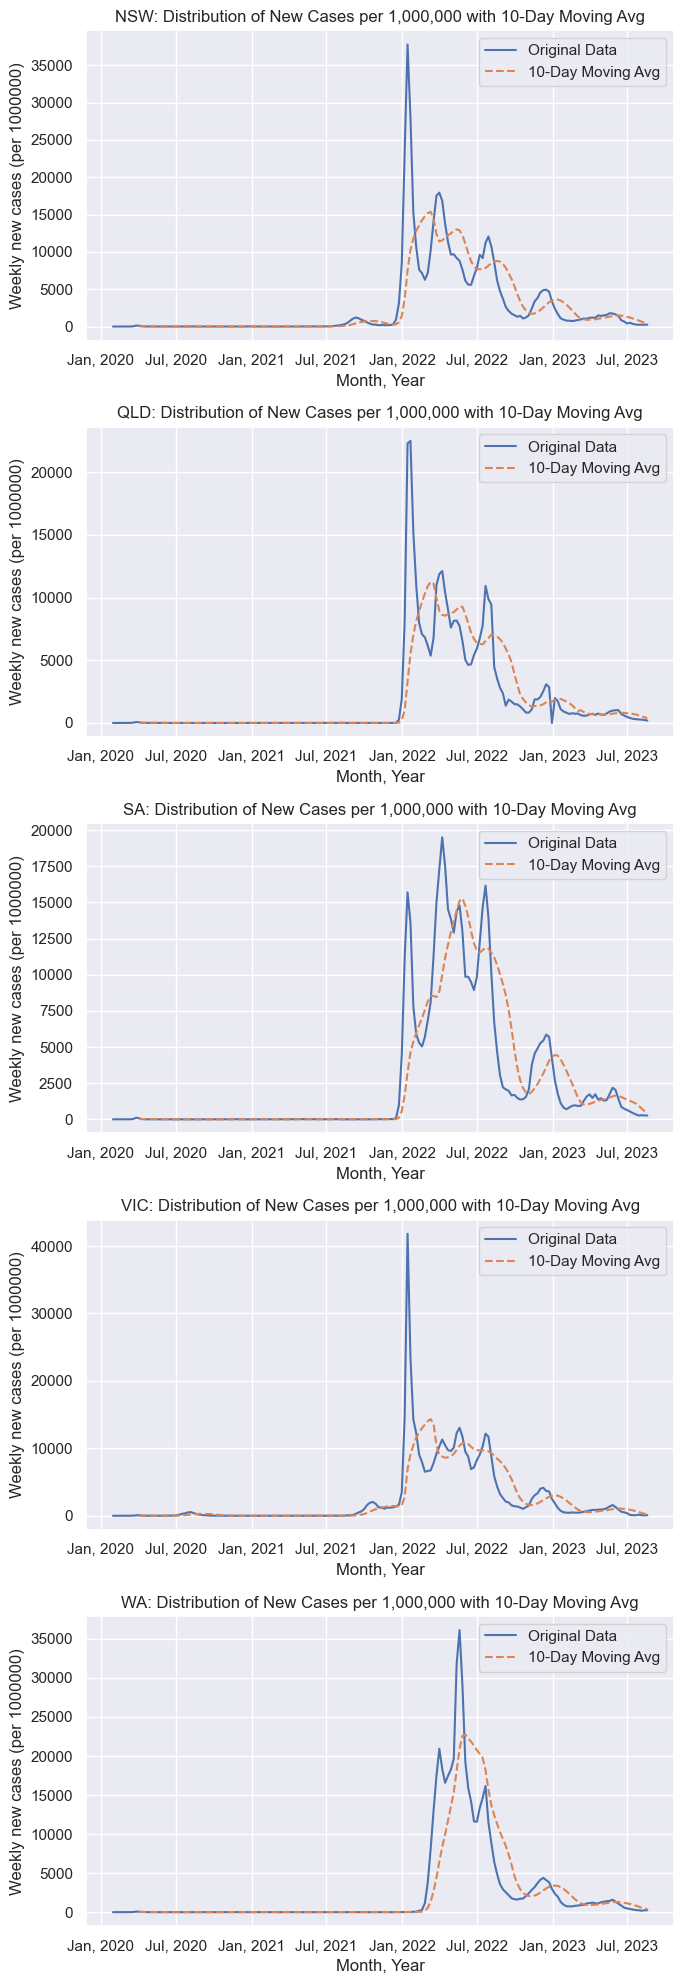

In [30]:
# Get unique regions
unique_regions = grouped_values['REGION'].unique()

# Set date formatting for the x-axis
month_year_formatter = mdates.DateFormatter('%b, %Y')
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")

# Create subplots for each region
fig, axes = plt.subplots(nrows=len(unique_regions), ncols=1, figsize=(7, 4 * len(unique_regions)))

# Iterate through unique regions and plot each one separately
for i, region in enumerate(unique_regions):
    data = grouped_values[grouped_values['REGION'] == region]
    date = data["WEEK_DATE"]
    value = data['CASES_PER_1000000']

    # Calculate the 10-day moving average using rolling window
    moving_avg = value.rolling(window=10).mean()

    axes[i].xaxis.set_major_locator(half_year_locator)
    axes[i].xaxis.set_major_formatter(year_month_formatter)
    monthly_locator = mdates.MonthLocator()
    axes[i].xaxis.set_minor_locator(monthly_locator)
    axes[i].xaxis.set_major_formatter(month_year_formatter)
    axes[i].set_title(f'{region}: Distribution of New Cases per 1,000,000 with 10-Day Moving Avg')
    
    # Plot the original data as a line
    axes[i].plot(date, value, label='Original Data')

    # Plot the 10-day moving average as a dashed line
    axes[i].plot(date, moving_avg, linestyle='--', label='10-Day Moving Avg')

    # Set the legend for each subplot
    axes[i].legend(loc='upper right')

    # Label x and y axes
    axes[i].set_xlabel('Month, Year')
    axes[i].set_ylabel('Weekly new cases (per 1000000)')
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Above we can see the line plots for each region with normalised **CASES_PER_1000000** along with a 10-day moving average to further analyse the progress of cases for the duration of three years. These graphs re-iterate our initial observations. Each region's trend can be observed more closely. <br><br>

Finally, we can study the relationship between number of new cases and deaths in five states.<br>

For this, we will create a new column **POPULATION** to store the corresponding population of the region. Another column, **YEAR**, will have the Year extracted from the **WEEK_DATE** for each record.

In [31]:
grouped_values['POPULATION'] = grouped_values['REGION'].map(population)
grouped_values['YEAR'] = pd.DatetimeIndex(grouped_values['WEEK_DATE']).year

In [32]:
grouped_values

,REGION,WEEK_DATE,WEEKLY_CASES,WEEKLY_DEATHS,CASES_PER_CAPITA,CASES_PER_1000000,POPULATION,YEAR
0,NSW,2020-01-31,1,0.0,1.213769e-07,0.121377,8238800,2020
1,NSW,2020-02-07,0,0.0,0.000000e+00,0.000000,8238800,2020
2,NSW,2020-02-14,0,0.0,0.000000e+00,0.000000,8238800,2020
3,NSW,2020-02-21,0,0.0,0.000000e+00,0.000000,8238800,2020
4,NSW,2020-02-28,0,0.0,0.000000e+00,0.000000,8238800,2020
...,...,...,...,...,...,...,...,...
925,WA,2023-07-21,751,4.0,2.658219e-04,265.821889,2825200,2023
926,WA,2023-07-28,697,60.0,2.467082e-04,246.708198,2825200,2023
927,WA,2023-08-04,517,11.0,1.829959e-04,182.995894,2825200,2023
928,WA,2023-08-11,677,10.0,2.396291e-04,239.629053,2825200,2023


Using the above table, we can create scatter plot for each region to study the relationship between **WEEKLY_CASES** and **WEEKLY_DEATHS** for each year.

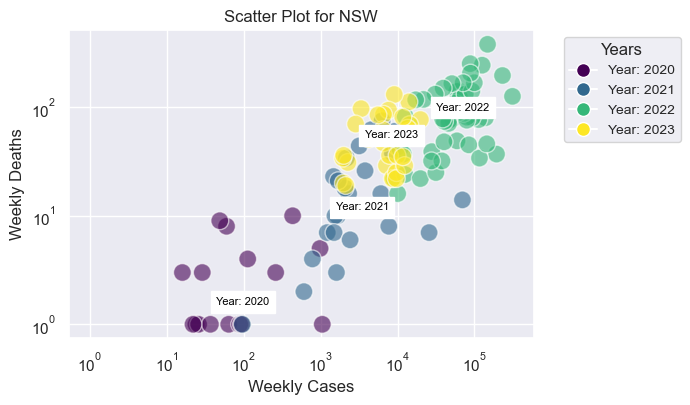

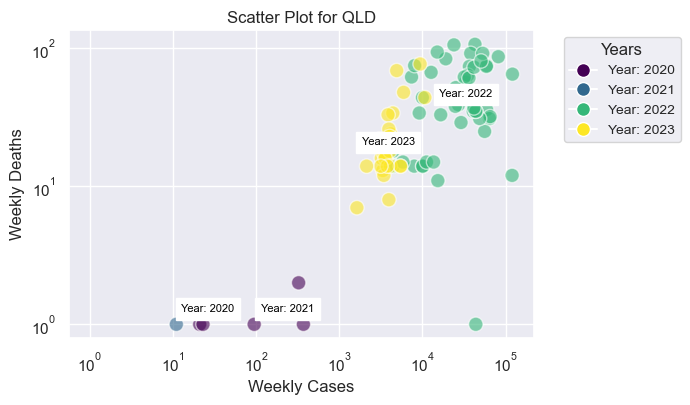

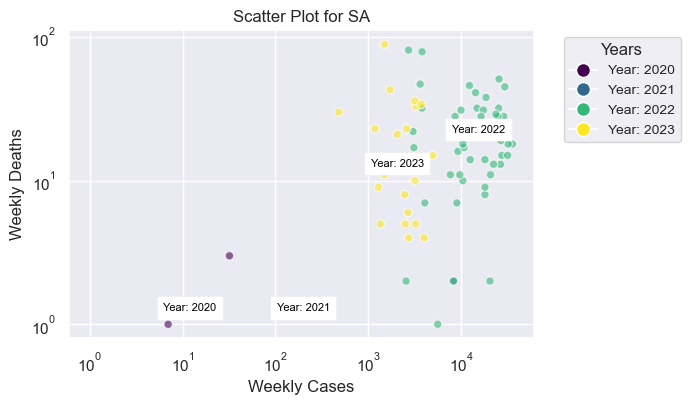

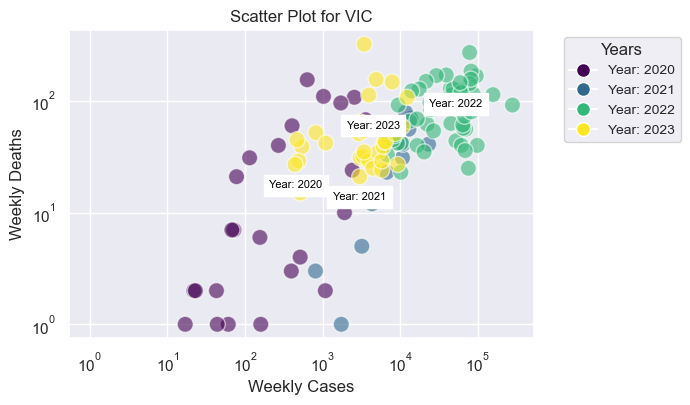

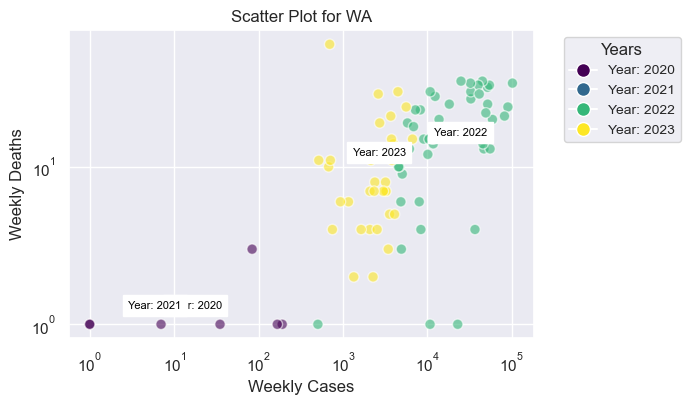

In [33]:
from matplotlib.lines import Line2D

# Get unique regions
unique_regions = grouped_values['REGION'].unique()

# Loop through each region
for selected_region in unique_regions:
    # Filter the data for the selected region
    data_region = grouped_values[grouped_values['REGION'] == selected_region]

    # Create a scatterplot
    plt.figure(figsize=(6, 4))
    scatter = plt.scatter(
        x=data_region['WEEKLY_CASES'],
        y=data_region['WEEKLY_DEATHS'],
        s=data_region['POPULATION'] / 50000,
        c=data_region['YEAR'].astype(int),
        cmap="viridis",
        alpha=0.6,
        edgecolors="white",
        linewidth=1
    )
    plt.title(f"Scatter Plot for {selected_region}")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Weekly Cases")
    plt.ylabel("Weekly Deaths")

    # Create custom legend handles and labels for each year color
    unique_years = data_region['YEAR'].unique()
    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis((year - min(unique_years)) / (max(unique_years) - min(unique_years))), markersize=10) for year in unique_years]
    labels = [f'Year: {year}' for year in unique_years]

    # Add the legend with custom handles and labels
    plt.legend(handles, labels, title="Years", loc="upper left", bbox_to_anchor=(1.05, 1), prop={'size': 10})

    # Calculate the boundaries of the scatterplot
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()

    # Add a common year label for each year in the data
    unique_years = data_region['YEAR'].unique()
    for year in unique_years:
        year_data = data_region[data_region['YEAR'] == year]
        label_x = year_data['WEEKLY_CASES'].mean()  # X-coordinate for the labels (adjust as needed)
        label_y = year_data['WEEKLY_DEATHS'].mean()  # Y-coordinate for the labels (adjust as needed)

        # Adjust label positions to stay within the boundaries
        label_x = max(x_min, min(x_max, label_x))
        label_y = max(y_min, min(y_max, label_y))

        color = plt.cm.viridis((year - min(unique_years)) / (max(unique_years) - min(unique_years)))  # Match color to year
        plt.text(
            label_x,
            label_y + 0.5,
            f'Year: {year}',
            fontsize=8,
            horizontalalignment='center',
            verticalalignment='center',
            backgroundcolor='white',
            color="black"  
        )

    # Show the plot
    plt.show()


Each point on the scatter plot represents a single data point or observation in our dataset. For NSW, we can see a clear positive relationship where the number of weekly_cases and the number of weekly_deaths increases. Similarly, one can observe the same results in the VIC region. In the other regions too, the relationship is positive but there are plenty of outliers in the data. In all the regions, observations in 2022 are much higher compared to 2023. The size of the data points is relative to the population size of the region. We can observe that the size of data points is quite small for SA and WA as opposed to those of NSW, VIC and QLD. <br><br>

From all the above visualisations, we can conclude with certain key observations:
1. **Weekly Deaths:** Among the regions (WA, SA, QLD, VIC, NSW), WA has consistently shown the lowest maximum weekly death count, followed by SA, QLD, VIC, and NSW. SA consistently has the least weekly maximum case count, followed by WA, QLD, VIC, and NSW.
2. **Spread Rate:** SA appears to have the fastest spread of COVID-19, infecting a significant portion of the population. WA spreads more slowly than SA due to its smaller population size. NSW and VIC show a similar and moderate spread, followed by a slower pace in QLD. These three regions (NSW, VIC, QLD) seem to have completed their respective outbreaks at around the same time.
3. **Historical Cases:** From the line plot depicting the historical trend of normalized weekly cases from January 2020 to July 2021, we can see that, most regions had low case counts, except for VIC, which experienced a slight peak in August 2020. From the second half of 2021, cases began rising, starting with NSW and VIC, followed by the other regions. In early 2022, VIC and NSW had the highest case rates, with VIC peaking at over 40,000 cases per 1,000,000 people, followed by QLD, SA, and WA. WA initially had low cases but later surged to over 37,000 cases per 1,000,000 people.
4. **2022 Fluctuations:** In 2022, there was a general decline in cases across all regions, with a steep increase observed in August-September. After this, cases dropped to below 10,000 per 1,000,000 people for all regions. Towards the end of the year, cases started to rise slightly, with SA leading, followed by NSW, WA, VIC, and QLD. However, by January 2023, cases had dropped significantly in QLD, and overall case counts remained low.
5. **Scatter Plot:** The scatter plot represents the relationship between weekly_cases and weekly_deaths in each region. In NSW and VIC, there is a clear positive relationship, where an increase in weekly_cases is associated with an increase in weekly_deaths. Similar positive relationships exist in other regions but with more outliers. Notably, observations in 2022 are higher than those in 2023. The size of data points reflects the population size of each region, with smaller points for SA and WA and larger points for NSW, VIC, and QLD.<br><br>
Overall, the data indicates variations in COVID-19 trends across regions, with differences in spread rates, peaks, and population-adjusted case counts. It highlights the impact of the pandemic on different areas and the evolving nature of the outbreak over time.
